# Data Wrangling and EDA: Image Processing Project

# Overview of Image Classification and Recognition System

Image processing is used for everything from automatically tagging pictures in social media to unlocking our phones. Recent advancements in deep learning have made the accuracy of face recognition better. In this project, I will like to use the Humans dataset to develop a face classification/recognition system that can detect faces in images, identify the faces, and modify faces with digital makeup. I will start by setting up a development environment, and then train machine learning models to analyze images and identify facial landmarks. I will also code the facial feature detection, representing a face as a set of measurements, and encoding faces. Lastly, I will repurpose and adjust any of the existing ML systems I built.

In this project, I will provide my ML system with examples of each image and then develop learning algorithms that look at these examples and learn about the visual appearance of each.

That's why I created a a training dataset of labeled images, later I will feed them to the face recognition system to process the data. Overview of my system pipline will be as follows:

Generate input which the training dataset with N images, each labeled based on race and gender.

I use this training set to train a classifier/ML system to learn what every one of the images looks like.

In the end, I will evaluate the quality of the classifier/ML system by asking it to predict images for a new set of images that it’s never seen before. I’ll then compare the true image to the ones predicted by the ML system.

The dataset was taken from Kaggle(https://www.kaggle.com/ashwingupta3012/human-faces?select=Humans). It has a collection of 7.2k+ images. It has a mix of front face, side profile pictures which will help achieve great identifying results and an improved range of classifier/recognition possibilities.

# Project Deliverables

Detecting faces in images.
Analyzing a histogram of oriented gradients (HOG)
Identifying faces in images.
Locating facial features in images.
Coding for face detection.
Finding lookalikes using face detection.
Generating face encoding automatically.

In [1]:
import os, random, shutil, glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from skimage import color
from skimage import io, filters, transform, restoration, measure, segmentation, feature
from skimage.transform import rescale, resize, downscale_local_mean
%matplotlib inline
from PIL import Image
import glob
import skimage
import argparse


# Loading Images

There are two folders with images. one is named train, that's where all the training images are stored. Humans_faces folder is where I will be picking random images to test the system later.

# Count number of images in the human_faces folder

In [2]:
def count_images(dir):
    return len([1 for x in list(os.scandir(dir)) if x.is_file()])

In [9]:
folder_hum_faces = '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/Humans_faces'

In [10]:
count_images(folder_hum_faces)

7211

there are 7211 images in the humans_faces folder

# Count number of images in the train folder

Creating variables for the folder containing the train file as folder and filename respectively.

In [ ]:
folder = '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file'
filename_train = '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/train/'

In [ ]:
count_images(filename_train)

there are 7 images in the train folder

# Lets see what some of the training images look like

Visualize the images in the train folder

In [4]:
filename = '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/train/*'

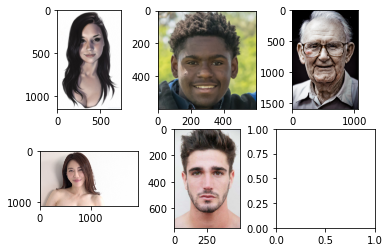

<Figure size 432x288 with 0 Axes>

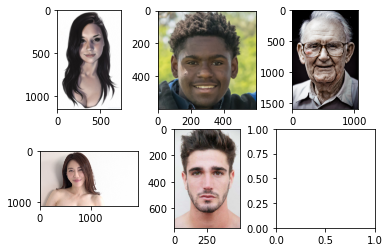

In [5]:
io.use_plugin('matplotlib')
collection = io.imread_collection(filename) #create a collection of all the images in the train folder
plt.figure()
io.imshow_collection(collection) 

# Resized Images in the new images folder

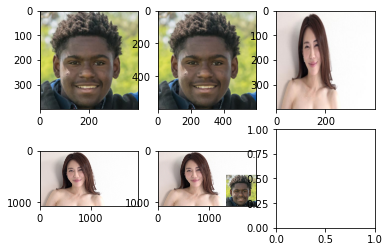

<Figure size 432x288 with 0 Axes>

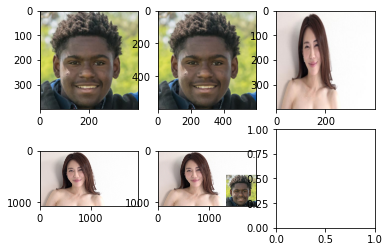

In [6]:
filename = '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/new_images/*'
io.use_plugin('matplotlib')
collection = io.imread_collection(filename) #create a collection of all the images in the train folder
plt.figure()
io.imshow_collection(collection) 

# Thresholding

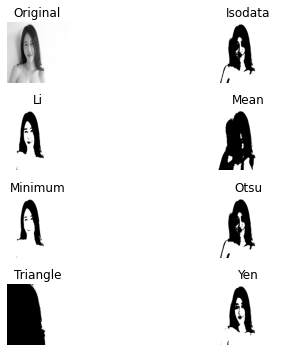

In [12]:
fruits_image = io.imread('new_images/new_t_wtf400.jpeg')
grayscale_fruits_image = color.rgb2gray(fruits_image)
fig, ax = filters.try_all_threshold(grayscale_fruits_image, verbose=False)
plt.show();